In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pytesseract as pt
%matplotlib inline

In [102]:
path = 'C:\\Users\\vishn\\holidays\\number_plate_detection\\images\\car_3.jpg'

In [103]:
org_img = cv2.imread(path)

In [104]:
image = cv2.cvtColor(org_img,cv2.COLOR_BGR2GRAY)

In [105]:
def plot_images (image1 , image2 , lable1 = "", lable2 = ""):
    fig = plt.figure(figsize=[15,15])
    img1 = fig.add_subplot(121)
    img1.imshow(image1,cmap='gray')
    img1.set(xticks=[],yticks=[],title=lable1)
    
    img2 = fig.add_subplot(122)
    img2.imshow(image2,cmap='gray')
    img2.set(xticks=[],yticks=[],title=lable2)

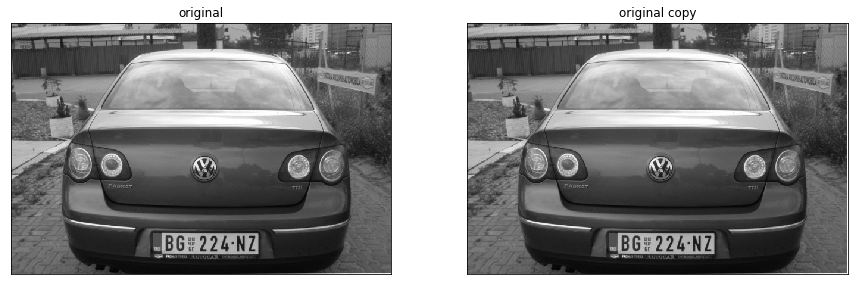

In [106]:
plot_images(image,image,"original","original copy")

In [107]:
blured_image = cv2.bilateralFilter(image,2,90,90)

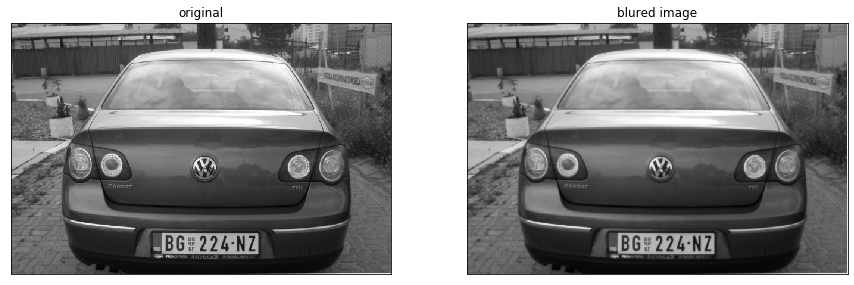

In [108]:
plot_images(image,blured_image,"original","blured image")

In [109]:
edges = cv2.Canny(blured_image,100,200)

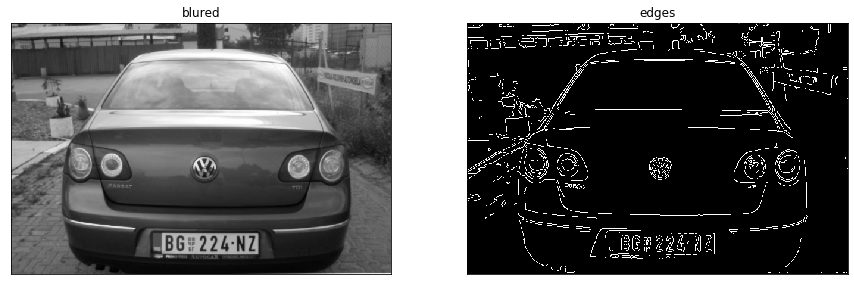

In [110]:
plot_images(blured_image,edges,"blured","edges")

In [111]:
cnts,new = cv2.findContours(edges.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [112]:
type(cnts)

list

In [113]:
print(cnts[0])

[[[347 392]]

 [[347 395]]

 [[348 395]]

 [[347 394]]]


In [114]:
img_cp = org_img.copy()

In [115]:
drawing_contours = cv2.drawContours(img_cp,cnts,-1,(90,255,25),2)

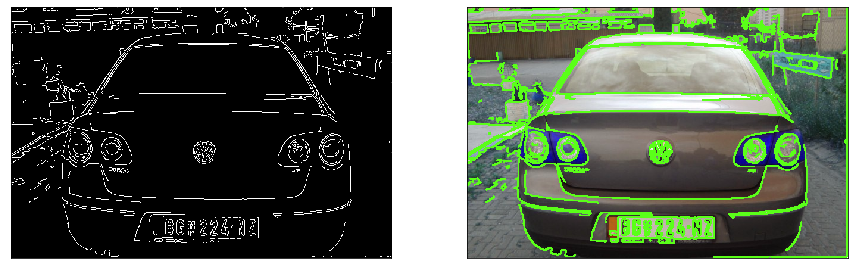

In [116]:
plot_images(edges,drawing_contours)

In [117]:
print(len(cnts))

278


In [118]:
cnts= sorted(cnts,key=cv2.contourArea,reverse=True)[:20]

In [119]:
len(cnts)

20

In [120]:
img_red_cnts = org_img.copy()

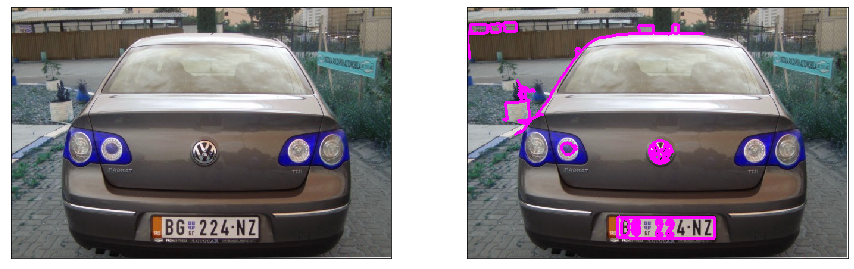

In [121]:
drawing_contours = cv2.drawContours(img_red_cnts,cnts,-1,(255,0,255),3)
plot_images(org_img.copy(),img_red_cnts)

In [136]:
plate = None

for i in cnts : 
    peri = cv2.arcLength(i,True)
    edge_count = cv2.approxPolyDP(i,0.02*peri,True)
    
    if len(edge_count) == 4:
        x,y,w,h = cv2.boundingRect(i)
        plate = image[y:y+h,x:x+w]
        break
        
cv2.imwrite("plate.png",plate)

True

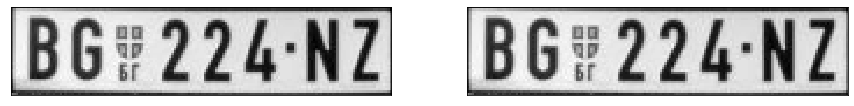

In [134]:
plot_images(plate,plate)

In [137]:
number = pt.image_to_string(plate,lang="eng")

In [139]:
print("Number on Number platte is : ",number)

Number on Number platte is :  BG#224:NZ
